In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<font color="#333">Om Jai Shree Ganeshai Namah</font>

In [2]:
#!rm -r all_data

In [3]:
import tensorflow as tf
import imghdr
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

#import urllib.request
#from PIL import Image
import imageio

In [4]:
timg = cv2.imread("../input/dataset/val/OSCC/OSCC_100x_196.jpg")
timg.shape

(1536, 2048, 3)

In [5]:
!rm -r ./all_data

rm: cannot remove './all_data': No such file or directory


In [6]:
!mkdir -p all_data/Normal
!mkdir -p all_data/OSCC

In [7]:
!cp -r ../input/dataset/test/Normal ./all_data/
!cp -r ../input/dataset/test/OSCC ./all_data/

In [8]:
!cp -r ../input/dataset/train/Normal ./all_data/
!cp -r ../input/dataset/train/OSCC ./all_data/

In [9]:
!cp -r ../input/dataset/val/Normal ./all_data/
!cp -r ../input/dataset/val/OSCC ./all_data/

In [10]:
os.listdir('./all_data/Normal')

['aug_76_5181.jpg',
 'aug_377_2786.jpg',
 'aug_166_1692.jpg',
 'aug_105_9248.jpg',
 'aug_196_9193.jpg',
 'aug_98_2217.jpg',
 'aug_76_6133.jpg',
 'aug_141_2596.jpg',
 'Normal_100x_73.jpg',
 'aug_183_7784.jpg',
 'aug_96_9621.jpg',
 'aug_217_9065.jpg',
 'aug_247_2408.jpg',
 'aug_3_484.jpg',
 'aug_37_4842.jpg',
 'aug_96_1675.jpg',
 'aug_24_7803.jpg',
 'aug_90_9976.jpg',
 'aug_256_1381.jpg',
 'aug_212_4846.jpg',
 'aug_251_7899.jpg',
 'aug_434_8053.jpg',
 'aug_162_3997.jpg',
 'aug_20_3897.jpg',
 'aug_164_7004.jpg',
 'aug_102_3593.jpg',
 'Normal_100x_87.jpg',
 'Normal_400x_2.jpg',
 'aug_206_1612.jpg',
 'Normal_100x_18.jpg',
 'aug_185_8604.jpg',
 'Normal_400x_183.jpg',
 'aug_212_4201.jpg',
 'aug_96_8645.jpg',
 'aug_390_188.jpg',
 'aug_123_8148.jpg',
 'aug_89_5201.jpg',
 'aug_661_6619.jpg',
 'aug_137_1812.jpg',
 'aug_37_4693.jpg',
 'aug_90_5021.jpg',
 'aug_205_5796.jpg',
 'aug_121_7191.jpg',
 'Normal_400x_196.jpg',
 'aug_145_6275.jpg',
 'Normal_100x_75.jpg',
 'Normal_400x_46.jpg',
 'aug_263_952

In [11]:
os.listdir('./all_data')

['Normal', 'OSCC']

In [12]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [13]:
#imghdr.what('../input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom/frame1002.jpg')

In [14]:
#!rm -r ./tjdata

In [15]:
#!mkdir -p ./tjdata/jerry
#!mkdir -p ./tjdata/tom

In [16]:
#!cp -r ../input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/jerry  ./tjdata/

In [17]:
#!cp -r ../input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom ./tjdata/

In [18]:
data_dir = './all_data/'

In [19]:
img_exts = ['jpeg', 'jpg', 'bmp', 'png']

class_name_arr = ['Normal', 'OSCC']

for classi in class_name_arr:
    for img in os.listdir(os.path.join(data_dir, classi)):
        img_path = data_dir + classi +'/'+img
        try : 
            imgcv = cv2.imread(img_path)
            img_ext = imghdr.what(img_path)
            if(img_ext not in img_exts):
                os.remove(img_path)
        except Exception as e:
            print("Issue with Image : {}".format(img_path))

In [20]:
os.listdir('./all_data/OSCC')

['OSCC_100x_178.jpg',
 'aug_46_1941.jpg',
 'aug_482_4548.jpg',
 'aug_53_2215.jpg',
 'aug_328_965.jpg',
 'aug_226_1326.jpg',
 'aug_297_122.jpg',
 'OSCC_400x_138.jpg',
 'OSCC_400x_422.jpg',
 'aug_398_1792.jpg',
 'aug_736_5034.jpg',
 'OSCC_100x_199.jpg',
 'OSCC_100x_297.jpg',
 'OSCC_100x_182.jpg',
 'OSCC_400x_284.jpg',
 'OSCC_400x_291.jpg',
 'aug_524_9740.jpg',
 'OSCC_400x_352.jpg',
 'OSCC_100x_248.jpg',
 'aug_149_6495.jpg',
 'OSCC_400x_269.jpg',
 'aug_530_5428.jpg',
 'aug_559_8717.jpg',
 'OSCC_100x_169.jpg',
 'OSCC_100x_236.jpg',
 'aug_527_9566.jpg',
 'OSCC_400x_214.jpg',
 'OSCC_100x_10.jpg',
 'OSCC_400x_474.jpg',
 'OSCC_100x_36.jpg',
 'aug_448_6979.jpg',
 'aug_697_5640.jpg',
 'aug_564_5387.jpg',
 'OSCC_400x_157.jpg',
 'aug_389_4038.jpg',
 'aug_648_7786.jpg',
 'aug_454_2868.jpg',
 'aug_189_2136.jpg',
 'OSCC_100x_409.jpg',
 'aug_270_8635.jpg',
 'aug_264_3490.jpg',
 'aug_244_9860.jpg',
 'OSCC_400x_34.jpg',
 'aug_543_1551.jpg',
 'aug_435_3681.jpg',
 'aug_343_2783.jpg',
 'aug_128_22.jpg',
 '

In [21]:
imgs = 256

In [22]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(imgs, imgs))

Found 5192 files belonging to 2 classes.


2022-09-30 17:49:43.354026: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
"""
def normalizeStaining(img, saveFile=None, Io=240, alpha=1, beta=0.15):
    ''' Normalize staining appearence of H&E stained images
    
    Example use:
        see test.py
        
    Input:
        I: RGB input image
        Io: (optional) transmitted light intensity
        
    Output:
        Inorm: normalized image
        H: hematoxylin image
        E: eosin image
    
    Reference: 
        A method for normalizing histology slides for quantitative analysis. M.
        Macenko et al., ISBI 2009
    '''
             
    HERef = np.array([[0.5626, 0.2159],
                      [0.7201, 0.8012],
                      [0.4062, 0.5581]])
        
    maxCRef = np.array([1.9705, 1.0308])
    
    # define height and width of image
    h, w, c = img.shape
    
    # reshape image
    img = img.reshape((-1,3))

    # calculate optical density
    OD = -np.log((img.astype(np.float)+1)/Io)
    
    # remove transparent pixels
    ODhat = OD[~np.any(OD<beta, axis=1)]
        
    # compute eigenvectors
    eigvals, eigvecs = np.linalg.eigh(np.cov(ODhat.T))
    
    #eigvecs *= -1
    
    #project on the plane spanned by the eigenvectors corresponding to the two 
    # largest eigenvalues    
    That = ODhat.dot(eigvecs[:,1:3])
    
    phi = np.arctan2(That[:,1],That[:,0])
    
    minPhi = np.percentile(phi, alpha)
    maxPhi = np.percentile(phi, 100-alpha)
    
    vMin = eigvecs[:,1:3].dot(np.array([(np.cos(minPhi), np.sin(minPhi))]).T)
    vMax = eigvecs[:,1:3].dot(np.array([(np.cos(maxPhi), np.sin(maxPhi))]).T)
    
    # a heuristic to make the vector corresponding to hematoxylin first and the 
    # one corresponding to eosin second
    if vMin[0] > vMax[0]:
        HE = np.array((vMin[:,0], vMax[:,0])).T
    else:
        HE = np.array((vMax[:,0], vMin[:,0])).T
    
    # rows correspond to channels (RGB), columns to OD values
    Y = np.reshape(OD, (-1, 3)).T
    
    # determine concentrations of the individual stains
    C = np.linalg.lstsq(HE,Y, rcond=None)[0]
    
    # normalize stain concentrations
    maxC = np.array([np.percentile(C[0,:], 99), np.percentile(C[1,:],99)])
    tmp = np.divide(maxC,maxCRef)
    C2 = np.divide(C,tmp[:, np.newaxis])
    
    # recreate the image using reference mixing matrix
    Inorm = np.multiply(Io, np.exp(-HERef.dot(C2)))
    Inorm[Inorm>255] = 254
    Inorm = np.reshape(Inorm.T, (h, w, 3)).astype(np.uint8)  
    
    # unmix hematoxylin and eosin
    #H = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,0], axis=1).dot(np.expand_dims(C2[0,:], axis=0))))
    #H[H>255] = 254
    #H = np.reshape(H.T, (h, w, 3)).astype(np.uint8)
    
    #E = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,1], axis=1).dot(np.expand_dims(C2[1,:], axis=0))))
    #E[E>255] = 254
    #E = np.reshape(E.T, (h, w, 3)).astype(np.uint8)
    
    #if saveFile is not None:
    #    Image.fromarray(Inorm).save(saveFile+'.png')
    #    Image.fromarray(H).save(saveFile+'_H.png')
    #    Image.fromarray(E).save(saveFile+'_E.png')

    return Inorm
"""   

"\ndef normalizeStaining(img, saveFile=None, Io=240, alpha=1, beta=0.15):\n    ''' Normalize staining appearence of H&E stained images\n    \n    Example use:\n        see test.py\n        \n    Input:\n        I: RGB input image\n        Io: (optional) transmitted light intensity\n        \n    Output:\n        Inorm: normalized image\n        H: hematoxylin image\n        E: eosin image\n    \n    Reference: \n        A method for normalizing histology slides for quantitative analysis. M.\n        Macenko et al., ISBI 2009\n    '''\n             \n    HERef = np.array([[0.5626, 0.2159],\n                      [0.7201, 0.8012],\n                      [0.4062, 0.5581]])\n        \n    maxCRef = np.array([1.9705, 1.0308])\n    \n    # define height and width of image\n    h, w, c = img.shape\n    \n    # reshape image\n    img = img.reshape((-1,3))\n\n    # calculate optical density\n    OD = -np.log((img.astype(np.float)+1)/Io)\n    \n    # remove transparent pixels\n    ODhat = OD[~np

In [24]:
def preprocess(x, y):
    #xinorm = normalizeStaining(x[0])
    return (x/255, y)

In [25]:
#scaled_data = data.map(lambda x,y : (x/255,y))
scaled_data = data.map(preprocess)

In [26]:
data_iterator = scaled_data.as_numpy_iterator()

2022-09-30 17:49:43.954240: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [27]:
batch = data_iterator.next()

In [28]:
print(batch[0][1].min())
print(batch[0][1].max())

0.032996323
1.0


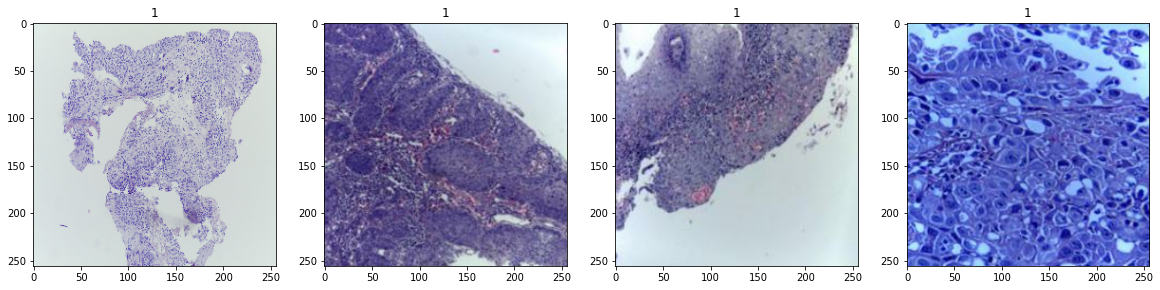

In [29]:
fig, ax =  plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [30]:
len(data) # 3170 = 32[batch_size] * 100[no_batches] approx.

163

In [31]:
train_size = int(len(data)*0.7)
print("training images : {}".format(train_size*32))
val_size = int(len(data)*0.2)
print("validation images : {}".format(val_size*32))
test_size = int(len(data)*0.1)
print("test images : {}".format(test_size*32))


training images : 3648
validation images : 1024
test images : 512


In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [33]:
len(test)

16

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import L2

In [35]:
"""
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
"""

'\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(32, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(64, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(128, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(256, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\n\nmodel.add(Dropout(0.2))\n\nmodel.add(Dense(256, activation="relu"))\nmodel.add(Dense(1, activation="sigmoid"))\n'

In [36]:
"""
baad model : 54% accuracy 
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(imgs, imgs, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu", kernel_regularizer  = L2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(256, activation="relu", kernel_regularizer  = L2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))
"""

'\nbaad model : 54% accuracy \nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(imgs, imgs, 3)))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(32, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(64, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(128, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(256, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\n\nmodel.add(Dense(256, activation="relu", kernel_regularizer  = L2(0.001)))\nmodel.add(Dropout(0.2))\n\nmodel.add(Dense(256, activation="relu", kernel_regularizer  = L2(0.001)))\nmodel.add(Dropout(0.2))\n\nmodel.add(Dense(1, activation="sigmoid"))\n'

In [37]:
"""
Best : 86% accuracy
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(512, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
"""

'\nBest : 86% accuracy\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(32, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(64, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(128, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(256, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(512, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Dropout(0.2))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(512, activation="relu"))\nmodel.add(Dense(1, activation="sigmoid"))\n'

In [38]:
"""
model = Sequential()

model.add(Conv2D(32, (3,3), 1, activation="relu", padding="same", input_shape=(imgs, imgs, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
"""


'\nmodel = Sequential()\n\nmodel.add(Conv2D(32, (3,3), 1, activation="relu", padding="same", input_shape=(imgs, imgs, 3)))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(64, (3,3), 1, activation="relu", padding="same"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(128, (3,3), 1, activation="relu", padding="same"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(256, (3,3), 1, activation="relu", padding="same"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\n\nmodel.add(Dense(256, activation="relu"))\nmodel.add(Dense(1, activation="sigmoid"))\n'

In [39]:
#vgg : Sticking to 51% even after 25 epochs

"""
model = Sequential()
model.add(Conv2D(input_shape=(imgs, imgs, 3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=1, activation="sigmoid"))
"""

'\nmodel = Sequential()\nmodel.add(Conv2D(input_shape=(imgs, imgs, 3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))\n\nmodel.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Co

In [40]:
""""
model = Sequential()

model.add(Conv2D(64, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(512, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Conv2D(1024, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(2048, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(2048, activation="relu"))

model.add(Dense(1, activation="sigmoid"))
"""


'"\nmodel = Sequential()\n\nmodel.add(Conv2D(64, (3,3), 1, activation="relu", input_shape=(256,256,3)))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(128, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(256, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(512, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(1024, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(2048, (3,3), 1, activation="relu"))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\nmodel.add(Dense(2048, activation="relu"))\n\nmodel.add(Dense(1, activation="sigmoid"))\n'

In [41]:
"""
model = Sequential()

model.add(Conv2D(16, (3,3), activation="relu", input_shape=(imgs, imgs, 3)))
model.add(AveragePooling2D())

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(AveragePooling2D())

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(AveragePooling2D())

#model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
"""


'\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), activation="relu", input_shape=(imgs, imgs, 3)))\nmodel.add(AveragePooling2D())\n\nmodel.add(Conv2D(32, (3,3), activation="relu"))\nmodel.add(AveragePooling2D())\n\nmodel.add(Conv2D(64, (3,3), activation="relu"))\nmodel.add(AveragePooling2D())\n\n#model.add(Dropout(0.5))\n\nmodel.add(Conv2D(64, (3,3), activation="relu"))\nmodel.add(AveragePooling2D())\nmodel.add(Dropout(0.5))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(128, activation="relu"))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(1, activation="sigmoid"))\n'

In [42]:
"""

model = Sequential()

model.add(Conv2D(16, (3,3), activation="relu", input_shape=(imgs, imgs, 3), padding="same"))
model.add(AveragePooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation="relu", padding="same"))
model.add(AveragePooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(AveragePooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(AveragePooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))"""

'\n\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), activation="relu", input_shape=(imgs, imgs, 3), padding="same"))\nmodel.add(AveragePooling2D())\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(32, (3,3), activation="relu", padding="same"))\nmodel.add(AveragePooling2D())\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(64, (3,3), activation="relu", padding="same"))\nmodel.add(AveragePooling2D())\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(64, (3,3), activation="relu", padding="same"))\nmodel.add(AveragePooling2D())\nmodel.add(Dropout(0.2))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(64, activation="relu"))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(64, activation="relu"))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1, activation="sigmoid"))'

In [43]:
"""
#vgg architecture 
model = Sequential()
model.add(Conv2D(input_shape=(imgs,imgs,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
"""

'\n#vgg architecture \nmodel = Sequential()\nmodel.add(Conv2D(input_shape=(imgs,imgs,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\n\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"

In [44]:

#AlexNet Architecture
model = Sequential()

model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [45]:
#model.compile(tf.optimizers.Adam(learning_rate=0.02),  loss=tf.losses.BinaryCrossentropy() , metrics=['accuracy'])
model.compile("adam", loss=tf.losses.BinaryCrossentropy() , metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [47]:
!mkdir logs

logdir = './logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

2022-09-30 17:49:50.206002: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-30 17:49:50.206356: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-09-30 17:49:50.207585: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [49]:
hist = model.fit(train, epochs = 80, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/80
  1/114 [..............................] - ETA: 10:44 - loss: 1.6856 - accuracy: 0.5312

2022-09-30 17:49:56.053057: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-30 17:49:56.053346: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/114 [..............................] - ETA: 4:06 - loss: 35.9745 - accuracy: 0.5156

2022-09-30 17:49:58.230437: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-30 17:49:58.242494: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-09-30 17:49:58.262019: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2022_09_30_17_49_58

2022-09-30 17:49:58.267598: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2022_09_30_17_49_58/2ee052d9cf4d.trace.json.gz
2022-09-30 17:49:58.292170: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2022_09_30_17_49_58

2022-09-30 17:49:58.295119: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2022_09_30_17_49_58/2ee052d9cf4d.memory_profile.json.gz
2022-09-30 17:49:58.2

114/114 [==============================] - 311s 3s/step - loss: 4.6657 - accuracy: 0.5694 - val_loss: 4.1665 - val_accuracy: 0.5918
Epoch 2/80
114/114 [==============================] - 306s 3s/step - loss: 0.9417 - accuracy: 0.6053 - val_loss: 0.9692 - val_accuracy: 0.5527
Epoch 3/80
114/114 [==============================] - 312s 3s/step - loss: 0.6515 - accuracy: 0.6672 - val_loss: 0.6746 - val_accuracy: 0.6611
Epoch 4/80
114/114 [==============================] - 308s 3s/step - loss: 0.6456 - accuracy: 0.6817 - val_loss: 0.7732 - val_accuracy: 0.5840
Epoch 5/80
114/114 [==============================] - 310s 3s/step - loss: 0.6246 - accuracy: 0.7026 - val_loss: 0.7258 - val_accuracy: 0.6152
Epoch 6/80
114/114 [==============================] - 310s 3s/step - loss: 0.5905 - accuracy: 0.7086 - val_loss: 1.2727 - val_accuracy: 0.5605
Epoch 7/80
114/114 [==============================] - 311s 3s/step - loss: 0.6179 - accuracy: 0.7108 - val_loss: 0.7485 - val_accuracy: 0.6426
Epoch 8/80

In [50]:
hist.history

{'loss': [4.665694236755371,
  0.9417288899421692,
  0.6515108942985535,
  0.6455932259559631,
  0.6245597004890442,
  0.5904639363288879,
  0.6179064512252808,
  0.5690935850143433,
  0.5690874457359314,
  0.5374691486358643,
  0.5069370865821838,
  0.4949166774749756,
  0.48629680275917053,
  0.5007667541503906,
  0.48629751801490784,
  0.4528646171092987,
  0.4660181403160095,
  0.4646231532096863,
  0.3975585997104645,
  0.38373151421546936,
  0.37231096625328064,
  0.4372214078903198,
  0.4005829989910126,
  0.38413113355636597,
  0.3919195830821991,
  0.3481944501399994,
  0.35344377160072327,
  0.3566012680530548,
  0.3063763380050659,
  0.31723034381866455,
  0.32313334941864014,
  0.3205125033855438,
  0.2692500948905945,
  0.28317204117774963,
  0.26631733775138855,
  0.258621484041214,
  0.2523559033870697,
  0.24981392920017242,
  0.2408187836408615,
  0.28499168157577515,
  0.25256627798080444,
  0.19012486934661865,
  0.18372784554958344,
  0.18575650453567505,
  0.180029

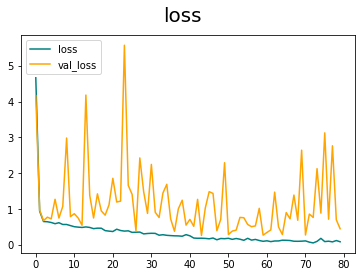

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

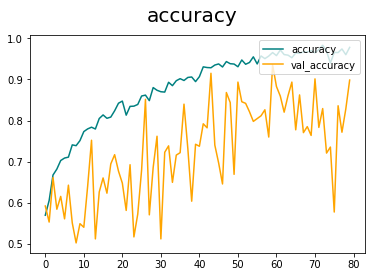

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [53]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [54]:
len(test)

16

In [55]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [56]:
print(f'Precision : {pre.result().numpy()}, Recall: {re.result().numpy()}. Accuracy : {acc.result().numpy()}')

Precision : 0.853741466999054, Recall: 0.9436089992523193. Accuracy : 0.88671875


In [57]:
#tomurl = 'https://i.pinimg.com/474x/92/a6/2f/92a62f0221f58fe503a15fcb13f5c107--tom-jerry-movies-.jpg'
#jerryurl = 'https://www.meme-arsenal.com/memes/2774744123cafbceb2c1f2aa14c65d82.jpg'

In [58]:
#import requests
#from io import BytesIO

In [59]:
#res = requests.get(tomurl)
#res.content()

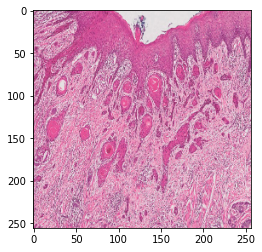

In [60]:
osccpath = "https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fsj.bdj.2018.926/MediaObjects/41415_2018_Article_BFsjbdj2018926_Fig1_HTML.jpg"
osccimg  = imageio.v2.imread(osccpath)
osccimg = cv2.resize(osccimg, (imgs, imgs))
osccimg = osccimg/255
plt.imshow(osccimg)
plt.show()

In [61]:
oscc_batch = np.expand_dims(osccimg, 0)

yhat = model.predict(oscc_batch)
print(yhat)

[[0.99842846]]


In [62]:
if yhat < 0.5:
    print("Predicted class is Normal")
else:
    print("Predicted class is OSCC")

Predicted class is OSCC


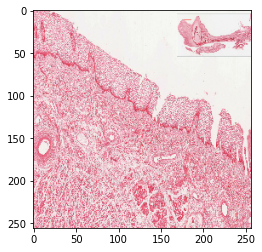

In [63]:
normalpath = "https://histology.medicine.umich.edu/sites/default/files/images/slides/9oral.jpg"
nimg  = imageio.v2.imread(normalpath)
nimg = cv2.resize(nimg, (imgs, imgs))
nimg = nimg/255
plt.imshow(nimg)
plt.show()

In [64]:
nimg_batch = np.expand_dims(nimg, 0)
yhat = model.predict(nimg_batch)
print(yhat)

if yhat < 0.5:
    print("Predicted class is Normal")
else:
    print("Predicted class is OSCC")

[[0.9984185]]
Predicted class is OSCC


In [65]:
from tensorflow.keras.models import load_model

In [66]:
!mkdir("models")

model.save(f'models/on_{acc.result().numpy()}.h5')

/bin/bash: -c: line 0: syntax error near unexpected token `"models"'
/bin/bash: -c: line 0: `mkdir("models")'


In [67]:
ldmodel = load_model(f'models/on_{acc.result().numpy()}.h5')

In [68]:
yhat = ldmodel.predict(nimg_batch)
if yhat < 0.5:
    print("Predicted class is Normal")
else:
    print("Predicted class is OSCC")

Predicted class is OSCC
